<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [42]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [43]:
# loading the data: Wholesale customers data

df = pd.read_csv('/Users/alex/Library/Mobile Documents/iCloud~md~obsidian/Documents/AX /Projects/Ironhack/Week2/Day4/lab-unsupervised-learning-en/data/Wholesale customers data.csv')
print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [44]:
# * Any categorical data to convert?

print(df.dtypes)

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


In [45]:
# * Any missing data to remove?

print(df.isnull().values.any())

False


In [56]:
# Column collinearity - any high correlations?

correlation_matrix = df.corr()
print(correlation_matrix)


                   Channel    Region     Fresh      Milk   Grocery    Frozen  \
Channel           1.000000  0.062028 -0.169172  0.460720  0.608792 -0.202046   
Region            0.062028  1.000000  0.055287  0.032288  0.007696 -0.021044   
Fresh            -0.169172  0.055287  1.000000  0.100510 -0.011854  0.345881   
Milk              0.460720  0.032288  0.100510  1.000000  0.728335  0.123994   
Grocery           0.608792  0.007696 -0.011854  0.728335  1.000000 -0.040193   
Frozen           -0.202046 -0.021044  0.345881  0.123994 -0.040193  1.000000   
Detergents_Paper  0.636026 -0.001483 -0.101953  0.661816  0.924641 -0.131525   
Delicassen        0.056011  0.045212  0.244690  0.406368  0.205497  0.390947   

                  Detergents_Paper  Delicassen  
Channel                   0.636026    0.056011  
Region                   -0.001483    0.045212  
Fresh                    -0.101953    0.244690  
Milk                      0.661816    0.406368  
Grocery                   0.924641

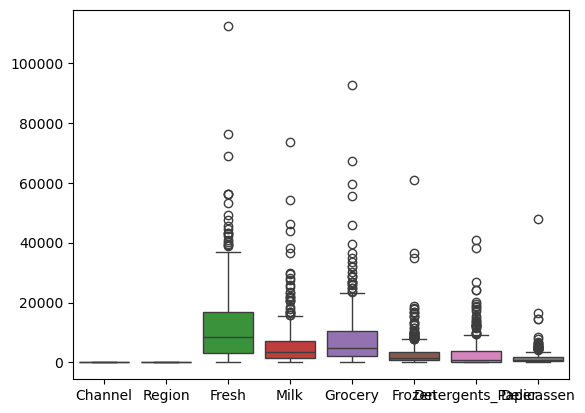

In [47]:
# see if there are outliers

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df)
plt.show()


In [48]:
#check data distribution

# A skewness near 0 → roughly symmetric
# Positive skew (> 1) → long right tail
# Negative skew (< -1) → long left tail

numeric_cols = df.select_dtypes(include='number').columns

skew_values = df[numeric_cols].skew()
print(skew_values)

Channel              0.760951
Region              -1.283627
Fresh                2.561323
Milk                 4.053755
Grocery              3.587429
Frozen               5.907986
Detergents_Paper     3.631851
Delicassen          11.151586
dtype: float64


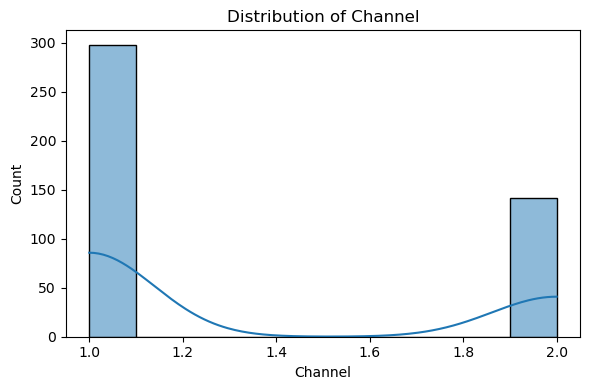

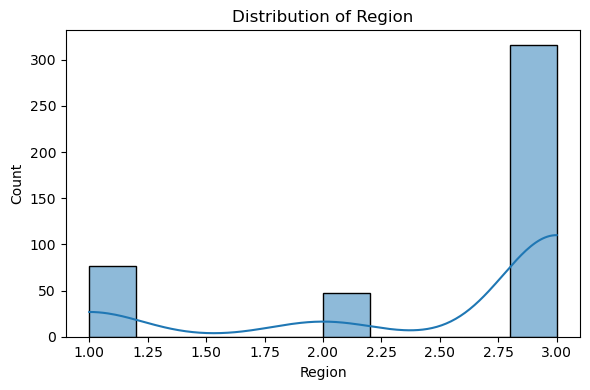

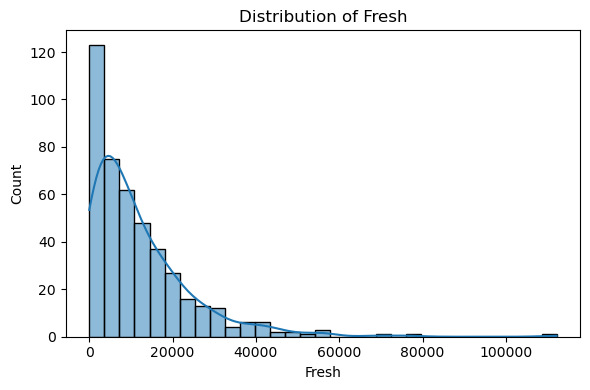

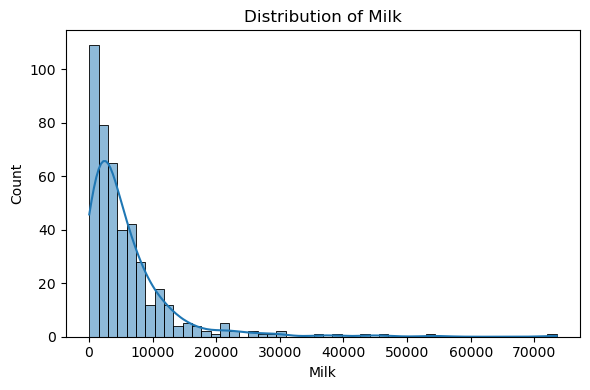

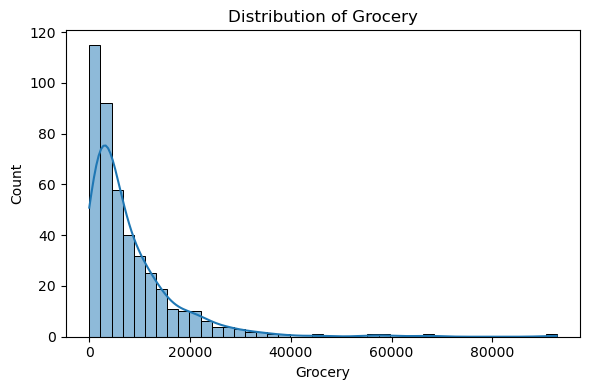

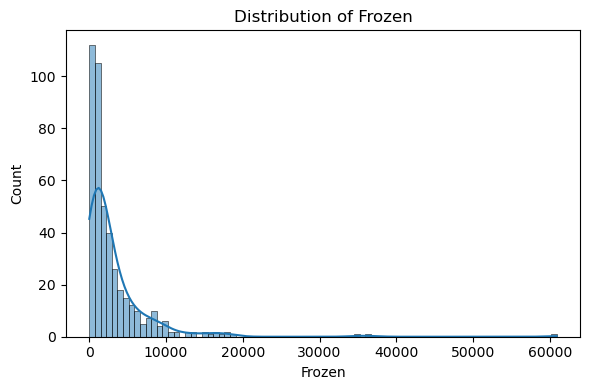

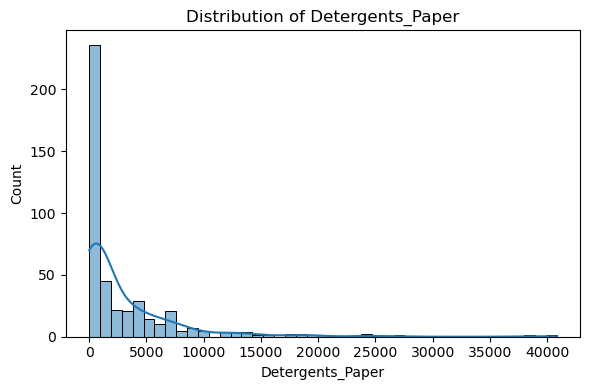

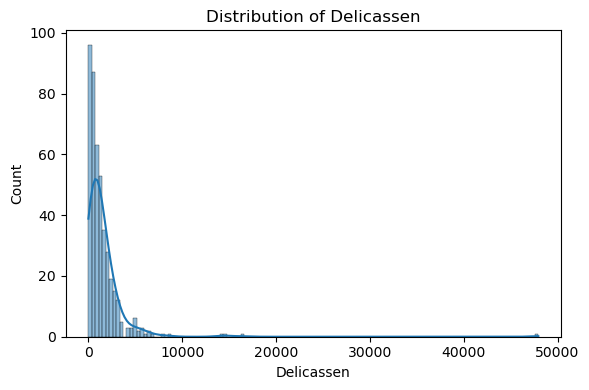

In [49]:
# Check data distribution visualisation

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

**Your observations here**

- Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
- Data are all int64, no categorial data
- No missing data
- High (>0.5) correlation of: Channel/Detergents_Paper, Milk/Grocery, Milk/Detergents_Paper, Channel/Grocery
- Very High (>0.8) Correlation of: Grocery/Detergents Paper
- Data is heavily right-skewed in most columns, especially Delicassen, Frozen, and Milk, meaning a few large values dominate the distribution, while Region is the only column with moderate left skew

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [50]:
#drop columns with high correlation

df_clean = df.drop(columns=["Detergents_Paper", "Milk"])

correlation_matrix_clean = df_clean.corr()
print(correlation_matrix_clean)

#check shape before/after
print("Original shape:", df.shape)
print("After cleaning:", df_clean.shape)


             Channel    Region     Fresh   Grocery    Frozen  Delicassen
Channel     1.000000  0.062028 -0.169172  0.608792 -0.202046    0.056011
Region      0.062028  1.000000  0.055287  0.007696 -0.021044    0.045212
Fresh      -0.169172  0.055287  1.000000 -0.011854  0.345881    0.244690
Grocery     0.608792  0.007696 -0.011854  1.000000 -0.040193    0.205497
Frozen     -0.202046 -0.021044  0.345881 -0.040193  1.000000    0.390947
Delicassen  0.056011  0.045212  0.244690  0.205497  0.390947    1.000000
Original shape: (440, 8)
After cleaning: (440, 6)


Original shape: (440, 6)
After removing outliers: (344, 6)


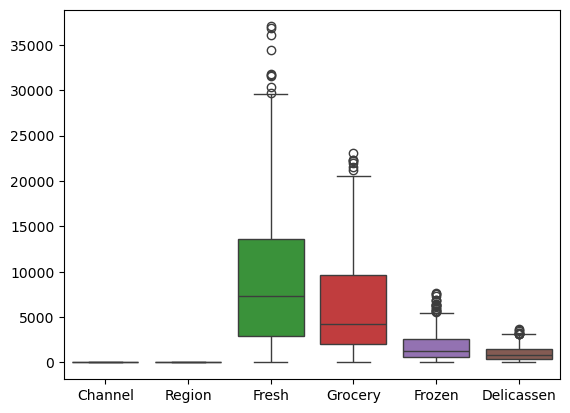

In [51]:
#remove outlier

Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within the IQR range
df_clean_no_outliers = df_clean[~((df_clean < (Q1 - 1.5 * IQR)) | (df_clean > (Q3 + 1.5 * IQR))).any(axis=1)]

#check shape before/after
print("Original shape:", df_clean.shape)
print("After removing outliers:", df_clean_no_outliers.shape)

#show data
sns.boxplot(data=df_clean_no_outliers)
plt.show()

In [ ]:
#check if the skewness is out

numeric_cols = df_clean_no_outliers.select_dtypes(include='number').columns

skew_values_clean = df_clean_no_outliers[numeric_cols].skew()
print(skew_values_clean)

Channel       0.834704
Region       -1.229424
Fresh         1.116180
Grocery       1.158030
Frozen        1.351616
Delicassen    1.044667
dtype: float64


In [55]:
#check shape
print("After cleaning:", df_clean_no_outliers.shape)

After cleaning: (344, 6)


**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean_no_outliers[numeric_cols])

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(df_scaled, columns=numeric_cols)
print(df_scaled.head())

# Your code here:


    Channel    Region     Fresh   Grocery    Frozen  Delicassen
0  1.498427  0.603923  0.409486  0.236477 -0.966670    0.378428
1  1.498427  0.603923 -0.284135  0.605326 -0.053508    0.904181
2 -0.667367  0.603923  0.483149 -0.377352  2.684800    0.918586
3  1.498427  0.603923  0.007057 -0.211030 -0.700036    0.514067
4  1.498427  0.603923  0.342373  0.128781 -0.809757   -0.573450


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [71]:
from sklearn.cluster import KMeans

# Step 1: Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

# Step 2: Assign cluster labels to the original cleaned DataFrame
customers['labels'] = kmeans.labels_

# Step 3: View the result
print(customers['labels'].value_counts())
print(customers.head())

labels
0    153
1    107
2     84
Name: count, dtype: int64
   Channel  Region  Fresh  Grocery  Frozen  Delicassen  labels
0        2       3  12669     7561     214        1338       1
1        2       3   7057     9568    1762        1776       1
3        1       3  13265     4221    6404        1788       2
5        2       3   9413     5126     666        1451       1
6        2       3  12126     6975     480         545       1


/var/folders/_j/4p0l9p3s60q8v49n24yx3xn00000gn/T/ipykernel_91177/777916247.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['labels'] = kmeans.labels_


### Looking to the elbow we can choose 2 like the correct number of clusters

In [72]:


kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

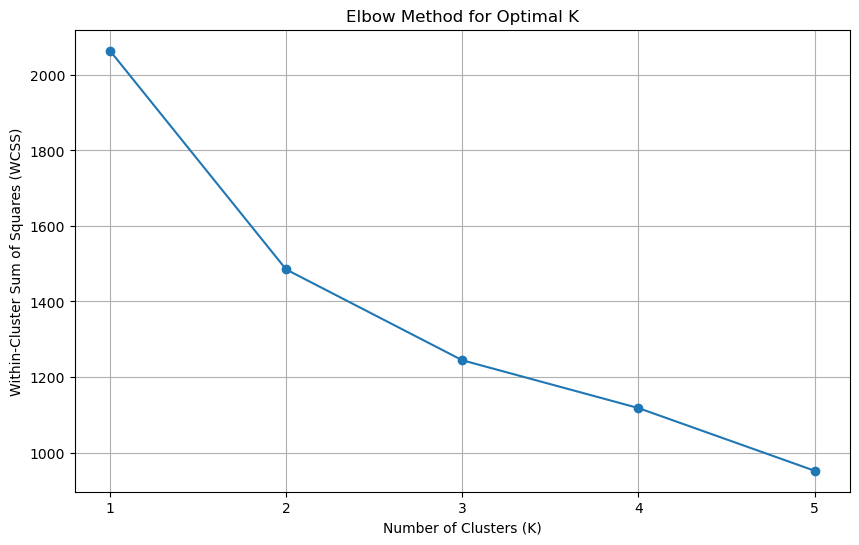


WCSS values for each K:
K=1: WCSS=2064.00
K=2: WCSS=1484.87
K=3: WCSS=1244.42
K=4: WCSS=1117.83
K=5: WCSS=951.91


In [73]:

wcss = []
k_range = range(1, 6) 
for i in k_range:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init='auto', random_state=0)
    kmeans.fit(customers_scale)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()
print("\nWCSS values for each K:")
for k, value in zip(k_range, wcss):
    print(f"K={k}: WCSS={value:.2f}")

Count the values in `labels`.

In [78]:
customers['labels'].value_counts()

labels
0    153
1    107
2     84
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [ ]:
from sklearn.cluster import DBSCAN 

# Step 1: Initiate and fit DBSCAN on your scaled data
dbscan = DBSCAN(eps=2) #elbow point is 2
dbscan.fit(df_scaled)

# Step 2: Assign DBSCAN cluster labels to your DataFrame
df_clean_no_outliers['labels_DBSCAN'] = dbscan.labels_



/var/folders/_j/4p0l9p3s60q8v49n24yx3xn00000gn/T/ipykernel_91177/2624518507.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_no_outliers['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [124]:
df_clean_no_outliers['labels_DBSCAN'].value_counts()

labels_DBSCAN
 1    237
 0    105
-1      2
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [125]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    hue=hue)
    plt.title(f'{x} vs {y}')
    return plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

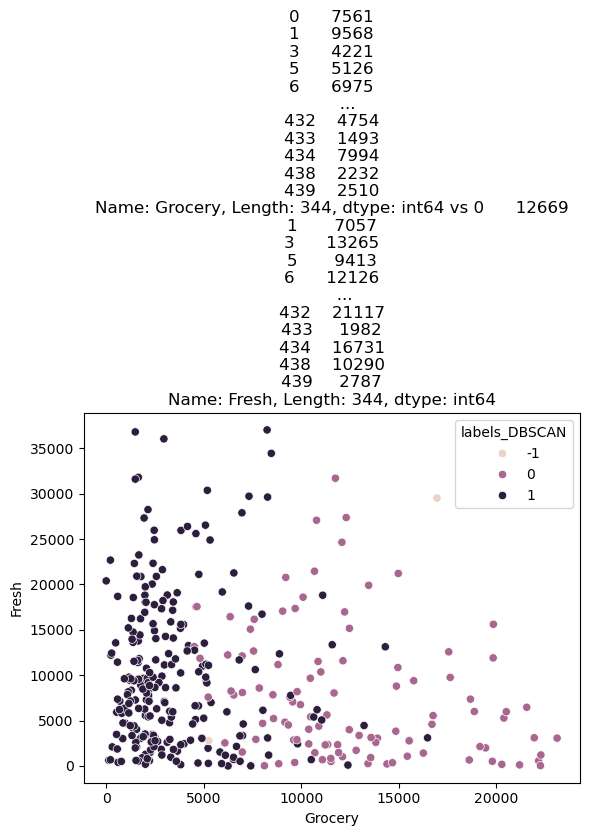

In [126]:

plot(customers["Grocery"],customers["Fresh"],hue = customers["labels_DBSCAN"])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

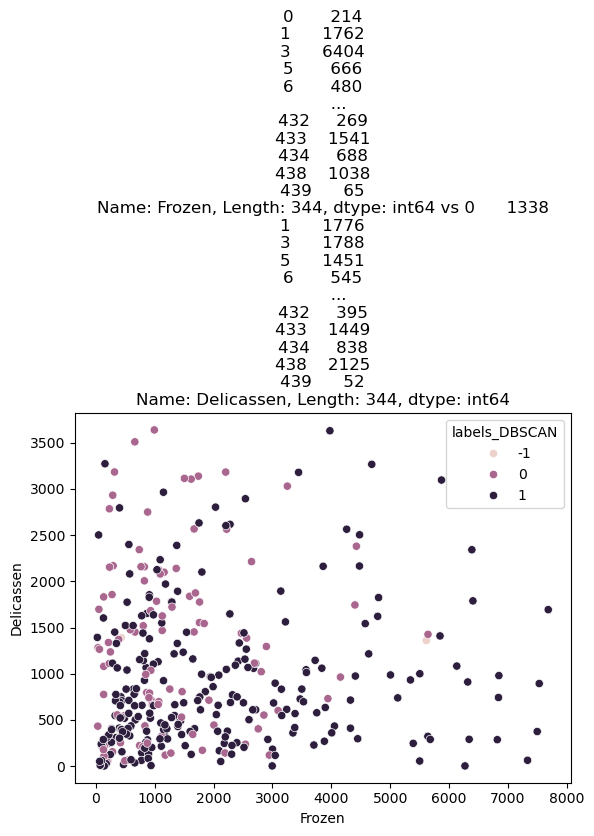

In [127]:

plot(customers["Frozen"],customers["Delicassen"],hue = customers["labels_DBSCAN"])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [128]:
#means by kmeans

kmeans_group_means = df_clean_no_outliers.groupby('labels').mean(numeric_only=True)
print(kmeans_group_means)


         Channel    Region         Fresh       Grocery       Frozen  \
labels                                                                
0       1.000000  2.568627   6614.509804   3360.117647  1168.771242   
1       1.981308  2.654206   7567.093458  12458.504673  1274.467290   
2       1.011905  2.285714  16627.750000   3704.642857  3835.011905   

         Delicassen  labels_DBSCAN  
labels                              
0        732.470588       1.000000  
1       1300.345794       0.018692  
2       1197.809524       0.952381  


In [129]:
# means by DBSCAN

dbscan_group_means = df_clean_no_outliers.groupby('labels_DBSCAN').mean(numeric_only=True)

print(dbscan_group_means)

               Channel    Region         Fresh       Grocery       Frozen  \
labels_DBSCAN                                                               
-1                 1.5  1.000000  16158.000000  11115.500000  3022.000000   
 0                 2.0  2.666667   7655.009524  12390.847619  1280.180952   
 1                 1.0  2.476793  10052.059072   3523.535865  2096.489451   

                Delicassen    labels  
labels_DBSCAN                         
-1             1375.500000  2.000000  
 0             1282.561905  1.000000  
 1              904.645570  0.700422  


Which algorithm appears to perform better?

**Your observations here**

K-Means performs better in this case because:
- It gives clear, structured customer segments with obvious differences in spending.
- The cluster means align with typical customer profiling needs (low, medium, high spenders).
- DBSCAN’s noise group actually contains valuable high-spending customers, which makes it less useful for straightforward segmentation in this context. 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 